In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import math
import cv2
import imghdr
from matplotlib import pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
os.environ['MLDS'] ='/content/drive/MyDrive/MLNN DS'

# upload Group_Project_Data 2.zip 
%cd /content/drive/MyDrive/MLNN DS

/content/drive/MyDrive/MLNN DS


In [3]:
!unzip \*.zip && rm *.zip

Archive:  Group_Project_Data 2.zip
replace __MACOSX/._Group_Project_Data? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

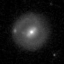

In [23]:
from google.colab.patches import cv2_imshow
img = "/content/drive/MyDrive/MLNN DS/Group_Project_Data/Train/Real/img_0.png"
image = cv2.imread(img)
cv2_imshow(image)

In [5]:
image_size = 224
labels = ('Real', 'Fake')
def get_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img))[..., ::-1]
                resized_arr = cv2.resize(img_arr, (image_size, image_size))
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)

    return np.array(data, dtype='object')

In [6]:
train = tf.keras.utils.image_dataset_from_directory("/content/drive/MyDrive/MLNN DS/Group_Project_Data/Train/")
valid = tf.keras.utils.image_dataset_from_directory("/content/drive/MyDrive/MLNN DS/Group_Project_Data/Valid/")

Found 6000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [7]:
train_iterator = train.as_numpy_iterator()

In [8]:
valid_iterator = valid.as_numpy_iterator()

In [9]:
train_batch = train_iterator.next()

In [10]:
valid_batch = valid_iterator.next()

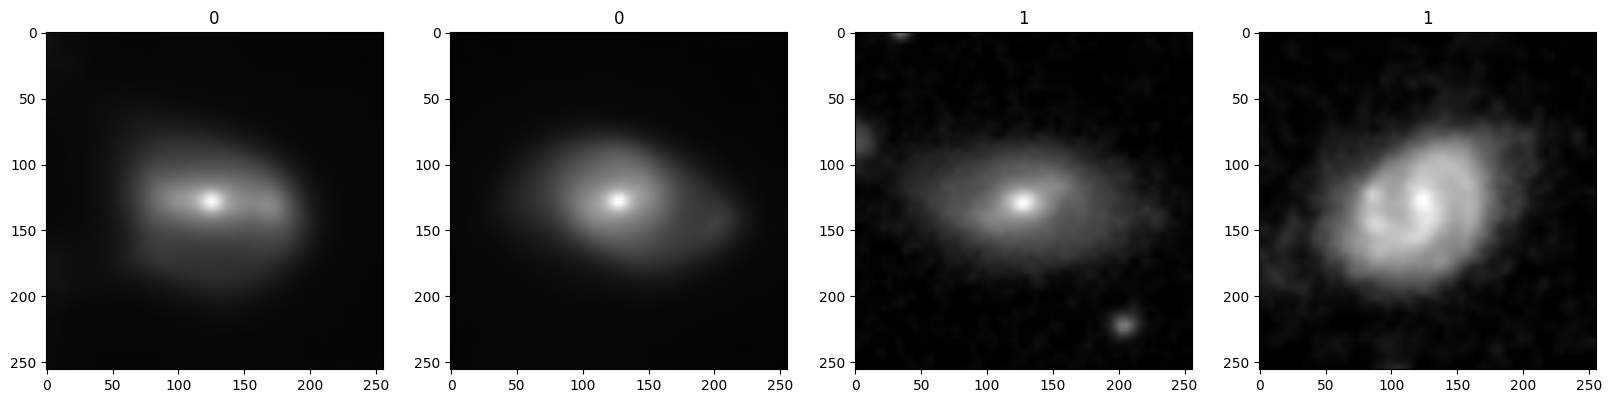

In [24]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(train_batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(train_batch[1][idx])

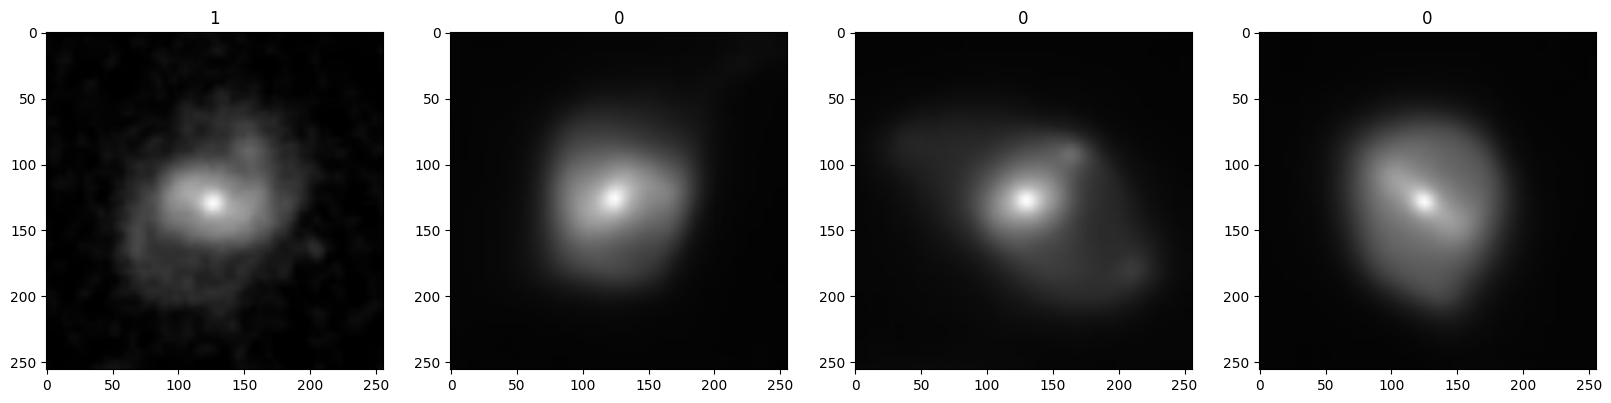

In [25]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(valid_batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(valid_batch[1][idx])

In [12]:
train = train.map(lambda x,y: (x/255, y))
valid = valid.map(lambda x,y: (x/255, y))

In [13]:

train.as_numpy_iterator().next()

(array([[[[7.8431377e-03, 7.8431377e-03, 7.8431377e-03],
          [7.8431377e-03, 7.8431377e-03, 7.8431377e-03],
          [7.8431377e-03, 7.8431377e-03, 7.8431377e-03],
          ...,
          [1.6176471e-02, 1.6176471e-02, 1.6176471e-02],
          [1.5686275e-02, 1.5686275e-02, 1.5686275e-02],
          [1.5686275e-02, 1.5686275e-02, 1.5686275e-02]],
 
         [[7.8431377e-03, 7.8431377e-03, 7.8431377e-03],
          [7.8431377e-03, 7.8431377e-03, 7.8431377e-03],
          [7.8431377e-03, 7.8431377e-03, 7.8431377e-03],
          ...,
          [1.6176471e-02, 1.6176471e-02, 1.6176471e-02],
          [1.5686275e-02, 1.5686275e-02, 1.5686275e-02],
          [1.5686275e-02, 1.5686275e-02, 1.5686275e-02]],
 
         [[7.8431377e-03, 7.8431377e-03, 7.8431377e-03],
          [7.8431377e-03, 7.8431377e-03, 7.8431377e-03],
          [7.7205882e-03, 7.7205882e-03, 7.7205882e-03],
          ...,
          [1.5992647e-02, 1.5992647e-02, 1.5992647e-02],
          [1.5686275e-02, 1.5686275e-

In [14]:
valid.as_numpy_iterator().next()

(array([[[[1.17647061e-02, 1.17647061e-02, 1.17647061e-02],
          [1.17647061e-02, 1.17647061e-02, 1.17647061e-02],
          [1.02941180e-02, 1.02941180e-02, 1.02941180e-02],
          ...,
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],
 
         [[1.17647061e-02, 1.17647061e-02, 1.17647061e-02],
          [1.17647061e-02, 1.17647061e-02, 1.17647061e-02],
          [1.02941180e-02, 1.02941180e-02, 1.02941180e-02],
          ...,
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],
 
         [[1.17647061e-02, 1.17647061e-02, 1.17647061e-02],
          [1.17647061e-02, 1.17647061e-02, 1.17647061e-02],
          [1.02941180e-02, 1.02941180e-02, 1.02941180e-02],
          ...,
          [1.22549027e-04, 1.22549027e-04, 1.2254

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras import layers, models, optimizers, losses, callbacks,\
                             regularizers

In [32]:
model = Sequential()

In [33]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [34]:
opt= optimizers.Adam(learning_rate=0.01)
model.compile(optimizer = opt, loss = tf.losses.BinaryCrossentropy(), metrics=['accuracy'])


In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 30, 30, 16)      

In [36]:
logdir='logs'

In [37]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [45]:
hist = model.fit(train, epochs=20, validation_data=valid, callbacks=[tensorboard_callback])

Epoch 1/20
188/188 [==============================] - 20s 103ms/step - loss: 0.0627 - accuracy: 0.9860 - val_loss: 0.1005 - val_accuracy: 0.9905
Epoch 2/20
188/188 [==============================] - 20s 103ms/step - loss: 0.1961 - accuracy: 0.9818 - val_loss: 0.3696 - val_accuracy: 0.9840
Epoch 3/20
188/188 [==============================] - 20s 105ms/step - loss: 0.3640 - accuracy: 0.9633 - val_loss: 0.0657 - val_accuracy: 0.9875
Epoch 4/20
188/188 [==============================] - 20s 104ms/step - loss: 0.0873 - accuracy: 0.9825 - val_loss: 0.1252 - val_accuracy: 0.9855
Epoch 5/20
188/188 [==============================] - 19s 96ms/step - loss: 0.0890 - accuracy: 0.9802 - val_loss: 0.1610 - val_accuracy: 0.9840
Epoch 6/20
188/188 [==============================] - 20s 104ms/step - loss: 0.0711 - accuracy: 0.9840 - val_loss: 0.0655 - val_accuracy: 0.9870
Epoch 7/20
188/188 [==============================] - 20s 105ms/step - loss: 0.0543 - accuracy: 0.9882 - val_loss: 0.0775 - val_acc

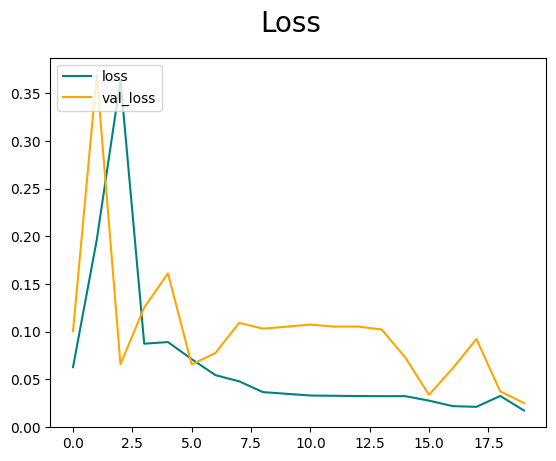

In [46]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

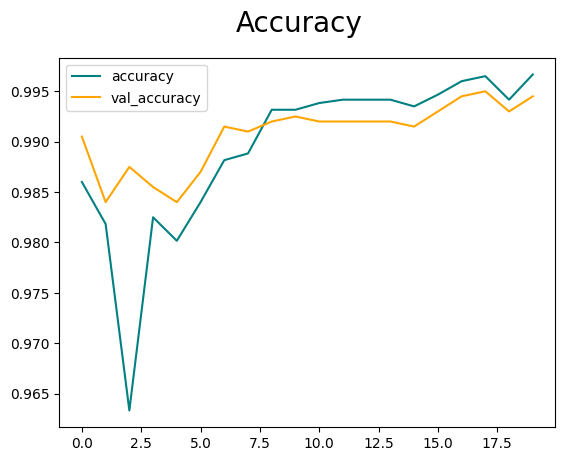

In [47]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

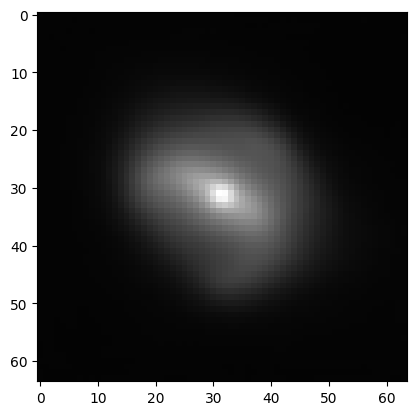

In [41]:
import cv2
img = cv2.imread("/content/drive/MyDrive/MLNN DS/Group_Project_Data/Train/Fake/img_0.png")
plt.imshow(img)
plt.show()


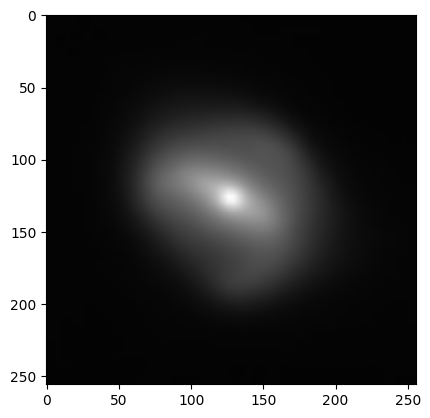

In [42]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [43]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 238ms/step


array([[0.02132136]], dtype=float32)

In [44]:
if yhat > 0.5: 
    print(f'Predicted class is Real')
else:
    print(f'Predicted class is Fake')

Predicted class is Fake
